In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pyshtools as pysh
import SLmod as SL
from numpy import pi as pi

#set plotting parameters
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]

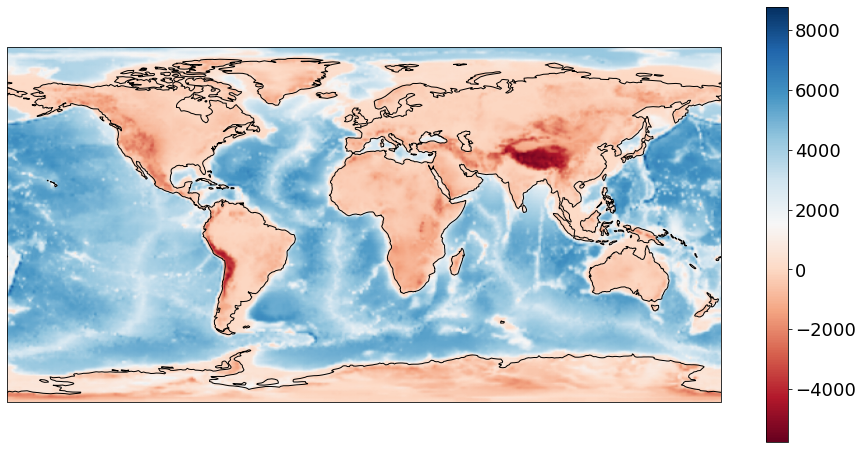

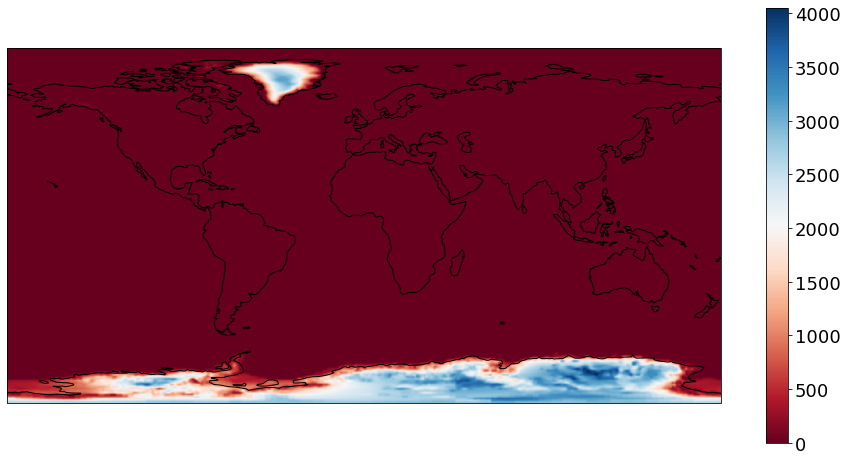

In [9]:
L=256
sl0,ice0 = SL.get_sl_ice_data(L)
SL.plot(sl0)
SL.plot(ice0)

In [10]:
C = SL.ocean_function(sl0,ice0)
A = SL.surface_integral(C)
A_earth = 4*pi*SL.b**2
print('fraction of surface which is ocean = ',A/A_earth)

fraction of surface which is ocean =  0.712960233719624


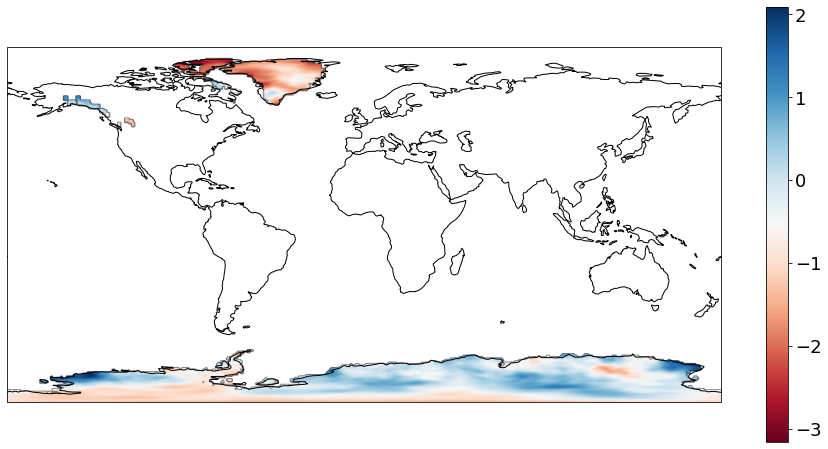

In [11]:
# set covariance for a random field
Q = SL.laplace_covariance(L,std = 1.,s = 2,mu = 0.1) 

# build a random melt geometry
ice = SL.random_field(Q)*SL.ice_mask(sl0,ice0,0.)


# plot the result with suitable mask
ice_mask = SL.ice_mask(sl0,ice0)
SL.plot(ice_mask*ice)

iteration =  1 relative change =  0.03528684824995378
iteration =  2 relative change =  0.0030257867631246944
iteration =  3 relative change =  0.0008857704335223842
iteration =  4 relative change =  0.00023714072453261763
iteration =  5 relative change =  8.996447624265841e-05
iteration =  6 relative change =  3.571216696901081e-05
iteration =  7 relative change =  1.3929249722380202e-05
iteration =  8 relative change =  5.476024287299376e-06
iteration =  9 relative change =  2.147608662039963e-06
iteration =  10 relative change =  8.435975600060733e-07


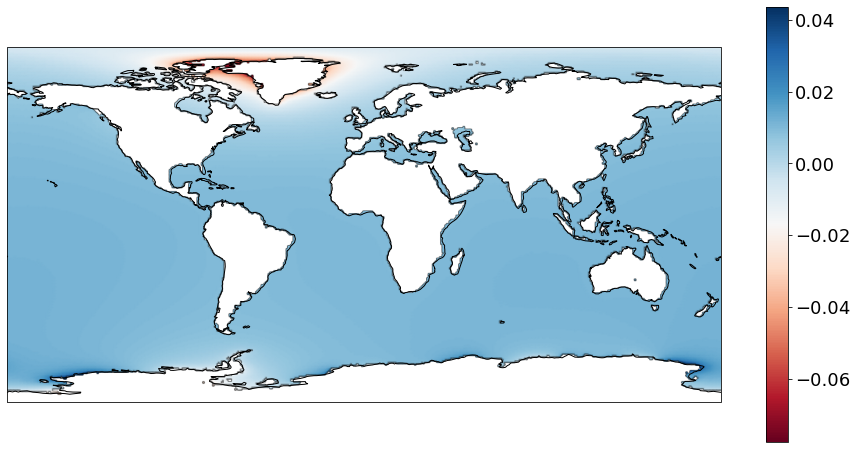

In [12]:
# set the direct load
zeta   = SL.rhoi*(1-C)*ice
# solve the fingerprint problem
sl,_,_,_,_ = SL.fingerprint(C,zeta)
ocean_mask = SL.ocean_mask(sl0,ice0)
SL.plot(ocean_mask*sl)

iteration =  1 relative change =  0.024461350546907228
iteration =  2 relative change =  0.0005077493041441343
iteration =  3 relative change =  0.0002687411390105203
iteration =  4 relative change =  8.409219988897407e-05
iteration =  5 relative change =  3.59467843732685e-05
iteration =  6 relative change =  1.3767773616062533e-05
iteration =  7 relative change =  5.523075863650121e-06
iteration =  8 relative change =  2.1725036641891748e-06
iteration =  9 relative change =  8.623144951184377e-07


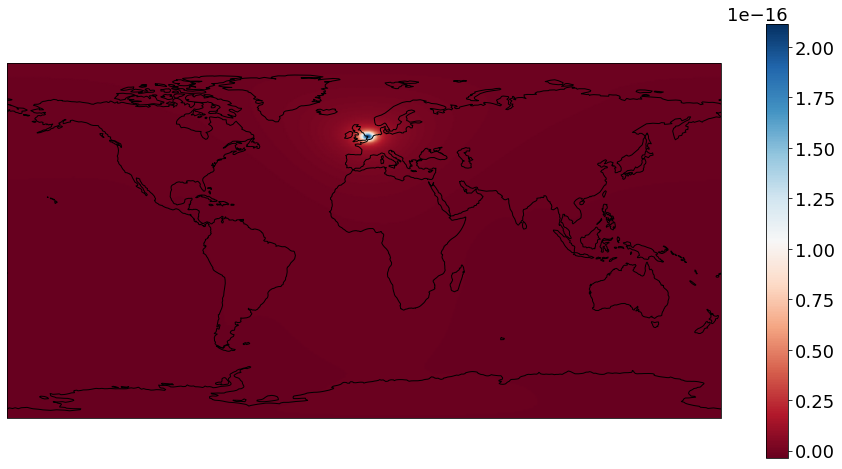

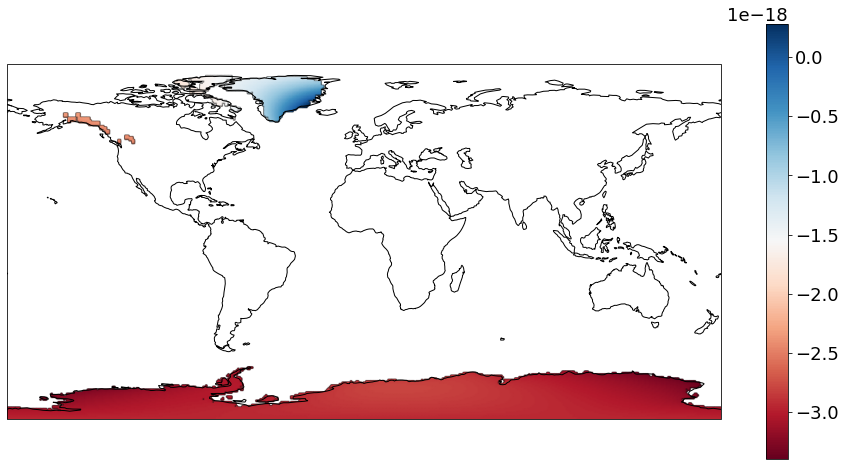

0.004208271221895325 0.004208211456828345 1.4201809681040495e-05


In [13]:
# set the observation point and set the adjoint loads
lats = np.zeros(1)
lons = np.zeros(1)
lats[0] =  52.48
lons[0] =  1.75

zeta_d   = SL.point_load(L,lats,lons,angle = 2)

# act the adjoint load on the sea level to get the observation
J =   SL.surface_integral(zeta_d*sl) 

sl_d,_,_,_,_ = SL.fingerprint(C,zeta_d)
SL.plot(sl_d)
SL.plot(ice_mask*sl_d)


# act the load on the adjoint sea level
J2 =   SL.surface_integral(zeta*sl_d)          

# compare the two values
print(J,J2,np.abs(J-J2)/np.abs(J))